In [23]:
from tensorflow.keras import datasets, utils, models,layers, optimizers, losses
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [24]:
(train_images, train_labels), (test_images, test_labels)= datasets.mnist.load_data()

#preprocessing
X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

print(train_labels[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


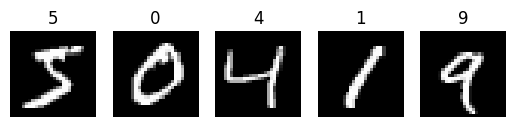

In [25]:
# Visualize Sample Training Data

for i in range(5):
    plt.subplot(1,5, i+1 )
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')

In [26]:
myInput = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(32, 3, padding='same', strides=2)(myInput)
bn1 = layers.BatchNormalization()(conv1)
ac1 = layers.Activation('relu')(bn1)

conv2 = layers.Conv2D(64, 3, padding='same', strides=2)(ac1)
bn2 = layers.BatchNormalization()(conv2)
ac2 = layers.Activation('relu')(bn2) 
flat = layers.Flatten()(ac2)
out_layer = layers.Dense(10, activation='softmax')(flat)

myModel = models.Model(myInput, out_layer)


myModel.summary()
myModel.compile(optimizer=optimizers.SGD(lr= 0.001), loss= losses.categorical_crossentropy)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 batch_normalization_15 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 14, 14, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_16 (Bat  (None, 7, 7, 64)         256       
 chNormalization)                                          

In [27]:
history = myModel.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 12s 30ms/step - loss: 0.4453 - val_loss: 0.5871
Epoch 2/50
375/375 [==============================] - 10s 27ms/step - loss: 0.1971 - val_loss: 0.1679
Epoch 3/50
375/375 [==============================] - 11s 29ms/step - loss: 0.1487 - val_loss: 0.1325
Epoch 4/50
375/375 [==============================] - 11s 28ms/step - loss: 0.1228 - val_loss: 0.1181
Epoch 5/50
375/375 [==============================] - 10s 27ms/step - loss: 0.1064 - val_loss: 0.1043
Epoch 6/50
375/375 [==============================] - 10s 27ms/step - loss: 0.0946 - val_loss: 0.0949
Epoch 7/50
375/375 [==============================] - 11s 28ms/step - loss: 0.0860 - val_loss: 0.0890
Epoch 8/50
375/375 [==============================] - 10s 27ms/step - loss: 0.0789 - val_loss: 0.0838
Epoch 9/50
375/375 [==============================] - 10s 27ms/step - loss: 0.0732 - val_loss: 0.0792
Epoch 10/50
375/375 [==============================] - 11s 28ms/step - loss: 0.068

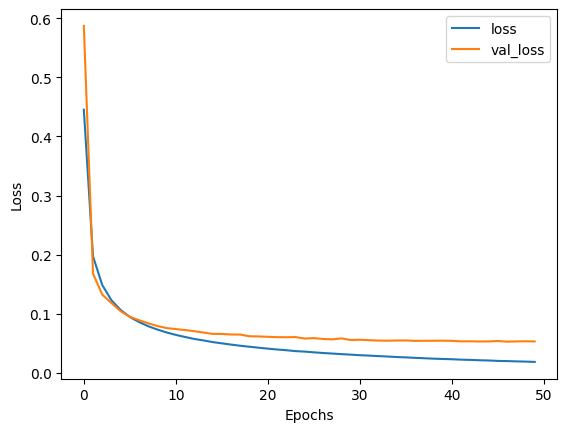

In [28]:
#plot losses
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

313/313 [==============================] - 1s 4ms/step - loss: 0.0430
test loss: 0.0430307574570179
313/313 [==============================] - 1s 3ms/step


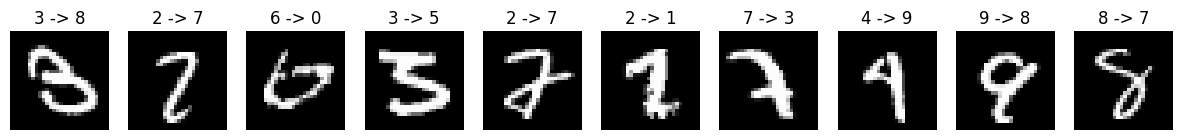

In [29]:
test_loss = myModel.evaluate(X_test, Y_test)
print("test loss:", test_loss)

test_labels_p = myModel.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

n=0
f, axs = plt.subplots(1, 10, figsize=(15,15))
for i in range(len(test_labels)):
    if n >= 10:
        break
    if (test_labels_p[i] != test_labels[i]):
        axs[n].imshow(test_images[i], cmap='gray')
        axs[n].set_title(f'{test_labels[i]} -> {test_labels_p[i]}')
        axs[n].axis('off')
        n = n+1